In [1]:
import sys
import time
import os
import subprocess
import math
import matplotlib.pyplot as plt
import numpy as np
import pylab as py
import random
import pandas as pd
from matplotlib import gridspec
from scipy import polyval, polyfit
from scipy.optimize import curve_fit
from datetime import datetime
import time
import corner
import emcee
from scipy.stats import linregress
from scipy import interpolate
from scipy import polyval, polyfit
from scipy import odr


In [2]:
####################################### Set Axes
def set_axes(ax, xlim=None, ylim=None, fontsize=16, twinx=True, twiny=True, minor=True, inout='in'):
        
        if not ylim is None:
            ax.set_ylim(ylim)
        else:
            ylim = ax.get_ylim() 
            
        if not xlim is None:    
            ax.set_xlim(xlim) 
        else:
            xlim = ax.get_xlim()
            
        ax.tick_params(which='major', length=6, width=1., direction=inout)
#         if minor:
        ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout)  
        
        if twiny:
            y_ax = ax.twinx()
            y_ax.set_ylim(ylim)
            y_ax.set_yticklabels([])
            y_ax.minorticks_on()
            y_ax.tick_params(which='major', length=6, width=1., direction=inout)
            if minor:
                y_ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout) 
        
        if twinx:
            x_ax = ax.twiny()
            x_ax.set_xlim(xlim)
            x_ax.set_xticklabels([])
            x_ax.minorticks_on()
            x_ax.tick_params(which='major', length=6, width=1.0, direction=inout)
            if minor:
                x_ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout)     

        for tick in ax.xaxis.get_major_ticks():
                    tick.label.set_fontsize(fontsize) 
        for tick in ax.yaxis.get_major_ticks():
                    tick.label.set_fontsize(fontsize) 
        
        return x_ax, y_ax

In [3]:
Dist_i = pd.read_csv("MLratio_i_distances.csv", sep=',')

for col in Dist_i.columns:
    newcol = col.strip()
    Dist_i.rename(columns={col:newcol}, inplace=True)
Dist_i = Dist_i.set_index("PGC")

# Dist_i = Dist_i[["DM_75","DMi_fid"]]

Dist_i.head(10)

,DM_75,DMi_fid,Mass_HI,Ms_i,Mb,F21,eF21,Qs,DMav_i,eDM_i,eDM_i_adj
PGC,,,,,,,,,,,
4,34.011709,33.410919,1.810891e+09,2.602457e+09,5.010942e+09,1.91,0.07,5.0,33.410121,0.220973,0.370439
16,34.491034,34.646528,1.754429e+09,2.405546e+10,2.638885e+10,1.19,0.20,5.0,34.657531,0.322299,0.395362
55,34.167913,33.811233,4.707702e+09,2.271251e+09,8.532494e+09,4.30,0.32,5.0,33.807721,0.256705,0.379228
68,35.108989,34.868604,4.193694e+09,1.157965e+10,1.715727e+10,1.61,0.27,5.0,34.905600,0.440260,0.440260
70,34.900087,35.358662,1.790008e+10,4.021006e+10,6.401717e+10,8.33,0.12,5.0,35.379137,0.219874,0.370169
76,34.937682,34.747891,9.832649e+09,7.655490e+10,8.963232e+10,4.42,0.11,5.0,34.759015,0.265674,0.381434
92,34.390188,32.893855,5.078582e+09,4.164620e+09,1.091913e+10,3.78,0.08,5.0,32.895009,0.217120,0.369491
96,36.577579,36.537371,2.951715e+10,1.909552e+11,2.302130e+11,2.93,0.16,5.0,36.570680,0.248441,0.377195
102,34.275251,34.317682,7.650315e+09,6.680367e+10,7.697859e+10,6.33,0.12,5.0,34.326114,0.255416,0.378911


In [4]:
df = pd.read_csv("MLratio_z_distances.csv", sep=',')

for col in df.columns:
    newcol = col.strip()
    df.rename(columns={col:newcol}, inplace=True)
Dist_z = df.set_index("PGC")

# Dist_z = df[["DMz_fid"]]

Dist_z.head(10)

,DM_75,DMz_fid,Mass_HI,Ms_z,Mb,F21,eF21,Qs,DMav_z,eDM_z,eDM_z_adj
PGC,,,,,,,,,,,
4,34.011709,33.428209,1.810891e+09,2.531358e+09,4.939843e+09,1.91,0.07,5.0,33.413981,0.224291,0.364650
16,34.491034,34.588900,1.754429e+09,2.546793e+10,2.780132e+10,1.19,0.20,5.0,34.573792,0.334656,0.394020
55,34.167913,33.810979,4.707702e+09,2.249444e+09,8.510687e+09,4.30,0.32,5.0,33.804047,0.255916,0.373066
68,35.108989,34.775536,4.193694e+09,1.278220e+10,1.835981e+10,1.61,0.27,5.0,34.788081,0.432692,0.432692
70,34.900087,35.260574,1.790008e+10,4.492259e+10,6.872970e+10,8.33,0.12,5.0,35.258484,0.222092,0.364065
76,34.937682,34.704567,9.832649e+09,8.005030e+10,9.312773e+10,4.42,0.11,5.0,34.690302,0.255024,0.372829
92,34.390188,32.854782,5.078582e+09,4.401750e+09,1.115626e+10,3.78,0.08,5.0,32.843826,0.217316,0.362794
96,36.577579,36.549722,2.951715e+10,1.893309e+11,2.285887e+11,2.93,0.16,5.0,36.552191,0.257578,0.373508
102,34.275251,34.309980,7.650315e+09,6.747926e+10,7.765418e+10,6.33,0.12,5.0,34.310558,0.232857,0.366930


In [5]:
df = pd.read_csv("MLratio_r_distances.csv", sep=',')

for col in df.columns:
    newcol = col.strip()
    df.rename(columns={col:newcol}, inplace=True)
Dist_r = df.set_index("PGC")

# Dist_r = df[["DMr_fid"]]

Dist_r.head(10)

,DM_75,DMr_fid,Mass_HI,Ms_r,Mb,F21,eF21,Qs,DMav_r,eDM_r,eDM_r_adj
PGC,,,,,,,,,,,
4,34.011709,33.454794,1.810891e+09,2.484183e+09,4.892668e+09,1.91,0.07,5.0,33.441119,0.242601,0.362561
16,34.491034,34.650373,1.754429e+09,2.379105e+10,2.612444e+10,1.19,0.20,5.0,34.640697,0.383673,0.395020
55,34.167913,33.823772,4.707702e+09,2.278585e+09,8.539828e+09,4.30,0.32,5.0,33.817196,0.274218,0.369836
68,35.108989,34.827453,4.193694e+09,1.210864e+10,1.768626e+10,1.61,0.27,5.0,34.814866,0.459267,0.459267
70,34.900087,35.355410,1.790008e+10,4.004375e+10,6.385086e+10,8.33,0.12,5.0,35.351799,0.275715,0.370180
76,34.937682,34.731166,9.832649e+09,7.701459e+10,9.009201e+10,4.42,0.11,5.0,34.736252,0.325960,0.381741
92,34.390188,32.921602,5.078582e+09,4.079203e+09,1.083372e+10,3.78,0.08,5.0,32.909352,0.246189,0.363387
96,36.577579,36.569313,2.951715e+10,1.826129e+11,2.218707e+11,2.93,0.16,5.0,36.555708,0.328098,0.382233
102,34.275251,34.297521,7.650315e+09,6.739076e+10,7.756567e+10,6.33,0.12,5.0,34.304582,0.303003,0.376459


In [6]:
df = pd.read_csv("MLratio_W1_distances.csv", sep=',')

for col in df.columns:
    newcol = col.strip()
    df.rename(columns={col:newcol}, inplace=True)
Dist_W1 = df.set_index("PGC")

Dist_W1 = Dist_W1.rename(columns={'DMw1_fid':'DM1_fid'})

# Dist_W1 = Dist_W1[["DMw1_fid"]]

Dist_W1.head(10)

,DM_75,DM1_fid,Mass_HI,Ms_W1,Mb,F21,eF21,Qw,DMav_W1,eDM_W1,eDM_W1_adj
PGC,,,,,,,,,,,
2,34.349020,34.490209,6.118492e+09,1.426708e+11,1.508084e+11,4.73,0.81,5.0,34.502927,0.363998,0.400827
4,34.011709,33.714909,1.810891e+09,1.844431e+09,4.252916e+09,1.91,0.07,4.0,33.718468,0.210844,0.324822
12,34.779466,34.987907,6.537934e+09,4.431121e+10,5.300666e+10,3.40,0.58,5.0,35.022050,0.301086,0.369606
16,34.491034,34.661762,1.754429e+09,2.350395e+10,2.583734e+10,1.19,0.20,5.0,34.668154,0.336020,0.386942
55,34.167913,33.949106,4.707702e+09,1.889488e+09,8.150731e+09,4.30,0.32,4.0,33.940111,0.243623,0.341089
68,35.108989,34.705024,4.193694e+09,1.407284e+10,1.965045e+10,1.61,0.27,5.0,34.711269,0.439992,0.439992
70,34.900087,35.148662,1.790008e+10,4.909873e+10,7.290584e+10,8.33,0.12,5.0,35.154141,0.236642,0.337625
76,34.937682,34.832315,9.832649e+09,6.838351e+10,8.146093e+10,4.42,0.11,5.0,34.853926,0.287557,0.362892
94,33.849365,33.855462,2.947329e+09,2.368500e+09,6.288448e+09,3.61,0.62,4.0,33.874906,0.316271,0.377142


In [7]:
Dist_W1.loc[1014]

DM_75         2.529719e+01
DM1_fid       2.577505e+01
Mass_HI       6.225564e+08
Ms_W1         1.109207e+09
Mb            1.937207e+09
F21           2.009690e+03
eF21          3.424900e+02
Qw            5.000000e+00
DMav_W1       2.579326e+01
eDM_W1        3.416115e-01
eDM_W1_adj    3.897172e-01
Name: 1014, dtype: float64

In [8]:
Dist_riz = pd.read_csv("MLratio_riz_distances.csv", sep=',')

for col in Dist_riz.columns:
    newcol = col.strip()
    Dist_riz.rename(columns={col:newcol}, inplace=True)
Dist_riz = Dist_riz.set_index("PGC")

# Dist_riz = Dist_riz[["DMriz_fid"]]

Dist_riz.head(10)

,DM_75,DMriz_fid,Mass_HI,Ms_riz,Mb,F21,eF21,Qs,DMav_riz,eDM_riz,eDM_riz_adj
PGC,,,,,,,,,,,
4,33.987953,33.421267,1.771699e+09,2.476099e+09,4.832459e+09,1.91,0.07,5.0,33.406405,0.243492,0.378634
16,34.460844,34.623502,1.706318e+09,2.360937e+10,2.587877e+10,1.19,0.20,5.0,34.614649,0.351766,0.397713
55,34.142010,33.803649,4.596718e+09,2.209518e+09,8.323153e+09,4.30,0.32,5.0,33.789261,0.272880,0.383813
68,35.068118,34.814419,4.038763e+09,1.166829e+10,1.703984e+10,1.61,0.27,5.0,34.820591,0.458982,0.458982
70,34.863482,35.317703,1.730666e+10,4.009340e+10,6.311125e+10,8.33,0.12,5.0,35.305743,0.258217,0.381229
76,34.901078,34.723933,9.506675e+09,7.472589e+10,8.736976e+10,4.42,0.11,5.0,34.718110,0.300819,0.388736
92,34.362141,32.880085,4.949069e+09,4.089370e+09,1.067163e+10,3.78,0.08,5.0,32.869548,0.232992,0.376784
96,36.496592,36.547618,2.739553e+10,1.730122e+11,2.094483e+11,2.93,0.16,5.0,36.542521,0.298778,0.388376
102,34.249348,34.304204,7.469960e+09,6.517174e+10,7.510679e+10,6.33,0.12,5.0,34.301642,0.290093,0.386846


In [9]:
# df = pd.read_csv("btfr_brent_updated.csv", sep='|')

# for col in df.columns:
#     newcol = col.strip()
#     df.rename(columns={col:newcol}, inplace=True)
    
# df = df.set_index("PGC")   

# db = df[["Vls"]]

# db.head()

In [10]:
def lambada(X):
    
    if ~np.isnan(X[col+"_riz"]):
        return X[col+"_riz"]
    elif ~np.isnan(X[col+"_i"]):
        return X[col+"_i"]
    elif ~np.isnan(X[col+"_r"]):
        return X[col+"_r"]
    elif ~np.isnan(X[col+"_z"]):
        return X[col+"_z"]
    else:
        return X[col]

df = Dist_i.join(Dist_riz, how='left', lsuffix='_i', rsuffix='_riz')
df = df.join(Dist_r, how='left')
df = df.join(Dist_z, how='left', lsuffix='_r', rsuffix='_z')
df = df.join(Dist_W1, how='outer') # .join(db)

df['Qs'] = df['Qs_i']
df['DM_75_w1'] = df['DM_75']

commons = ['DM_75', 'Mass_HI', 'Mb', 'F21', 'eF21', 'Qs']
for col in commons:
    df[col] = df.apply(lambada, axis=1)


df.head(10)

,DM_75_i,DMi_fid,Mass_HI_i,Ms_i,Mb_i,F21_i,eF21_i,Qs_i,DMav_i,eDM_i,...,Ms_W1,Mb,F21,eF21,Qw,DMav_W1,eDM_W1,eDM_W1_adj,Qs,DM_75_w1
PGC,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.426708e+11,1.508084e+11,4.73,0.81,5.0,34.502927,0.363998,0.400827,NaN,34.349020
4,34.011709,33.410919,1.810891e+09,2.602457e+09,5.010942e+09,1.91,0.07,5.0,33.410121,0.220973,...,1.844431e+09,4.832459e+09,1.91,0.07,4.0,33.718468,0.210844,0.324822,5.0,34.011709
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.431121e+10,5.300666e+10,3.40,0.58,5.0,35.022050,0.301086,0.369606,NaN,34.779466
16,34.491034,34.646528,1.754429e+09,2.405546e+10,2.638885e+10,1.19,0.20,5.0,34.657531,0.322299,...,2.350395e+10,2.587877e+10,1.19,0.20,5.0,34.668154,0.336020,0.386942,5.0,34.491034
55,34.167913,33.811233,4.707702e+09,2.271251e+09,8.532494e+09,4.30,0.32,5.0,33.807721,0.256705,...,1.889488e+09,8.323153e+09,4.30,0.32,4.0,33.940111,0.243623,0.341089,5.0,34.167913
68,35.108989,34.868604,4.193694e+09,1.157965e+10,1.715727e+10,1.61,0.27,5.0,34.905600,0.440260,...,1.407284e+10,1.703984e+10,1.61,0.27,5.0,34.711269,0.439992,0.439992,5.0,35.108989
70,34.900087,35.358662,1.790008e+10,4.021006e+10,6.401717e+10,8.33,0.12,5.0,35.379137,0.219874,...,4.909873e+10,6.311125e+10,8.33,0.12,5.0,35.154141,0.236642,0.337625,5.0,34.900087
76,34.937682,34.747891,9.832649e+09,7.655490e+10,8.963232e+10,4.42,0.11,5.0,34.759015,0.265674,...,6.838351e+10,8.736976e+10,4.42,0.11,5.0,34.853926,0.287557,0.362892,5.0,34.937682
92,34.390188,32.893855,5.078582e+09,4.164620e+09,1.091913e+10,3.78,0.08,5.0,32.895009,0.217120,...,NaN,1.067163e+10,3.78,0.08,NaN,NaN,NaN,NaN,5.0,NaN


In [11]:
old = pd.read_csv("../calibrators/DMs_EDD.csv.test", sep='|')

for col in old.columns:
    newcol = col.strip()
    old.rename(columns={col:newcol}, inplace=True)
old = old.set_index("pgc")

# oldCols = ["P0", "ggg", "rrr", "iii", "zzz"]
# for col in oldCols:
#     old[col] = old[col].apply(lambda x: np.float(x))


df = df.join(old, how='left', lsuffix='_new', rsuffix='_old')

df.head()

,DM_75_i,DMi_fid,Mass_HI_i,Ms_i,Mb_i,F21_i,eF21_i,Qs_i,DMav_i,eDM_i,...,pgc1,Nest,Vmodg,Nkt,N15,sglg,sgbg,RS,P0,DM_src
PGC,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,73150,200275,4976,0,7,341.4922,20.7395,2,2.02,2
4,34.011709,33.410919,1.810891e+09,2.602457e+09,5.010942e+09,1.91,0.07,5.0,33.410121,0.220973,...,120,202766,4154,0,0,316.0587,18.4514,2,-2.75,1
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12,210177,6279,0,1,286.4249,11.3510,2,0.56,2
16,34.491034,34.646528,1.754429e+09,2.405546e+10,2.638885e+10,1.19,0.20,5.0,34.657531,0.322299,...,16,211419,5434,0,1,287.6120,11.7030,2,0.92,1
55,34.167913,33.811233,4.707702e+09,2.271251e+09,8.532494e+09,4.30,0.32,5.0,33.807721,0.256705,...,55,0,4507,0,0,327.0996,19.7763,2,-2.83,1


In [12]:
for col in df.columns:
    print(col)

DM_75_i
DMi_fid
Mass_HI_i
Ms_i
Mb_i
F21_i
eF21_i
Qs_i
DMav_i
eDM_i
eDM_i_adj
DM_75_riz
DMriz_fid
Mass_HI_riz
Ms_riz
Mb_riz
F21_riz
eF21_riz
Qs_riz
DMav_riz
eDM_riz
eDM_riz_adj
DM_75_r
DMr_fid
Mass_HI_r
Ms_r
Mb_r
F21_r
eF21_r
Qs_r
DMav_r
eDM_r
eDM_r_adj
DM_75_z
DMz_fid
Mass_HI_z
Ms_z
Mb_z
F21_z
eF21_z
Qs_z
DMav_z
eDM_z
eDM_z_adj
DM_75
DM1_fid
Mass_HI
Ms_W1
Mb
F21
eF21
Qw
DMav_W1
eDM_W1
eDM_W1_adj
Qs
DM_75_w1
Vh
Vls
V3k
Vmod
f_cosmology
logWimx
logWimx_e
inc
Sqlt
Wqlt
DM_best
dDM_best
DMr
dDMr
RMS_r
DMr_raw
DMi
dDMi
RMS_i
DMi_raw
DMz
dDMz
RMS_z
DMz_raw
DM_w1
dDM_w1
RMS_w1
DMw1_raw
ggg
rrr
iii
zzz
w1
w2
RA
DEC
gl
gb
sgl
sgb
pgc1
Nest
Vmodg
Nkt
N15
sglg
sgbg
RS
P0
DM_src


In [13]:
len(df)

10153

In [14]:
df['logMs_riz'] = np.log10(df.Ms_riz)
df['logMs_r'] = np.log10(df.Ms_r)
df['logMs_i'] = np.log10(df.Ms_i)
df['logMs_z'] = np.log10(df.Ms_z)
df['logMs_W1'] = np.log10(df.Ms_W1)

In [15]:
df[['DMr_fid', 'DMi_fid', 'DMz_fid', 'DMriz_fid', 'DM1_fid']+['DMav_r', 'DMav_i', 'DMav_z', 'DMav_riz', 'DMav_W1']]

,DMr_fid,DMi_fid,DMz_fid,DMriz_fid,DM1_fid,DMav_r,DMav_i,DMav_z,DMav_riz,DMav_W1
PGC,,,,,,,,,,
2,NaN,NaN,NaN,NaN,34.490209,NaN,NaN,NaN,NaN,34.502927
4,33.454794,33.410919,33.428209,33.421267,33.714909,33.441119,33.410121,33.413981,33.406405,33.718468
12,NaN,NaN,NaN,NaN,34.987907,NaN,NaN,NaN,NaN,35.022050
16,34.650373,34.646528,34.588900,34.623502,34.661762,34.640697,34.657531,34.573792,34.614649,34.668154
55,33.823772,33.811233,33.810979,33.803649,33.949106,33.817196,33.807721,33.804047,33.789261,33.940111
68,34.827453,34.868604,34.775536,34.814419,34.705024,34.814866,34.905600,34.788081,34.820591,34.711269
70,35.355410,35.358662,35.260574,35.317703,35.148662,35.351799,35.379137,35.258484,35.305743,35.154141
76,34.731166,34.747891,34.704567,34.723933,34.832315,34.736252,34.759015,34.690302,34.718110,34.853926
92,32.921602,32.893855,32.854782,32.880085,NaN,32.909352,32.895009,32.843826,32.869548,NaN


In [16]:
import copy 

df_paper = copy.deepcopy(df)

# M_gas = 1.33 x M_HI = 1.33 x 2.36X10^5 x (3950/75)^2 x 69.07   => log Mgass = 10.78 not 7.851
df_paper['flag'] = 1
adhi_list = [5072, 9670, 49734, 51401, 1737674, 3091777, 5807477]
df_paper.loc[adhi_list]['flag'] = 0

df_paper['DM_av'] = df_paper[["DMav_riz", "DMav_W1"]].mean(axis=1)


indx = (df_paper.Qs<3) & (df_paper.Qw>=3)
df_paper['DM_av'][indx] = df_paper['DMav_W1'][indx]

indx = (df_paper.Qs>=3) & (df_paper.Qw<3)
df_paper['DM_av'][indx] = df_paper['DMav_riz'][indx]

df_paper['Dav'] = 10**((df_paper.DM_av-25)/5.)

df_paper['DM_75'] = df_paper[['DM_75_riz', 'DM_75_w1']].mean(axis=1)
df_paper['D75'] = 10**((df_paper.DM_75-25)/5.)

df_paper['logMs_av'] = df_paper[['logMs_riz', 'logMs_W1']].mean(axis=1)


indx = (df_paper.Qs<3) & (df_paper.Qw>=3)
df_paper['logMs_av'][indx] = df_paper['logMs_W1'][indx]

indx = (df_paper.Qs>=3) & (df_paper.Qw<3)
df_paper['logMs_av'][indx] = df_paper['logMs_riz'][indx]


df_paper['Ms'] = 10**df_paper.logMs_av

df_paper['Mass_HI'] = 2.356E5 * df_paper.F21 * (df_paper.D75**2)

df_paper['logMgas'] = np.log10(1.33*(10**(np.log10(df_paper.Mass_HI))))
df_paper['Mgas'] = 1.33*(10**(np.log10(df_paper.Mass_HI)))

df_paper['Mb'] = df_paper.Ms+df_paper.Mgas
df_paper['logMb'] = np.log10(df_paper.Mb)

old = pd.read_csv("../calibrators/corrected_mags_linewidth_all.csv", sep='|')
for col in old.columns:
    newcol = col.strip()
    old.rename(columns={col:newcol}, inplace=True)

old = old.set_index("pgc")

df_paper = df_paper.join(old[['inc_e']], how='left')


df_paper["DMr_err"]   = df_paper.eDM_r
df_paper["DMi_err"]   = df_paper.eDM_i
df_paper["DMz_err"]   = df_paper.eDM_z
df_paper["DMriz_err"] = df_paper.eDM_riz
df_paper["DM1_err"]   = df_paper.eDM_W1

df_paper["eDMr_adj"]   = df_paper.eDM_r_adj
df_paper["eDMi_adj"]   = df_paper.eDM_i_adj
df_paper["eDMz_adj"]   = df_paper.eDM_z_adj
df_paper["eDMriz_adj"] = df_paper.eDM_riz_adj
df_paper["eDM1_adj"]   = df_paper.eDM_W1_adj

df_paper['DM_err'] = np.nanmax(df_paper[["DMriz_err","DM1_err"]], axis=1)
df_paper['eDM_adj'] = np.nanmax(df_paper[["eDMriz_adj","eDM1_adj"]], axis=1)


cols = ["flag", "DM_av", "DM_err", "eDM_adj", "DMriz_fid", "DMriz_err", "eDMriz_adj"]
cols += ["DMr_fid", "DMr_err", "eDMr_adj"]
cols += ["DMi_fid", "DMi_err", "eDMi_adj"]
cols += ["DMz_fid", "DMz_err", "eDMz_adj"]
cols += ["DM1_fid", "DM1_err", "eDM1_adj"]
cols += ["DM_75", 'pgc1', 'Nest']
cols += ['logMs_av', 'logMs_riz', 'logMs_r', 'logMs_i', 'logMs_z', 'logMs_W1']
cols += ['logMgas', 'logMb']
cols += ['Vh', 'Vls', 'V3k', 'Vmod', 'f_cosmology']
cols += ['logWimx', 'logWimx_e', 'F21', 'eF21', 'inc', 'inc_e']
cols += ['ggg', 'rrr', 'iii', 'zzz', 'w1', 'w2']
cols += ['Qs', 'Qw']
cols += ['RA', 'DEC', 'gl', 'gb', 'sgl', 'sgb', 'Nkt', 'N15', 'sglg', 'sgbg', 'Vmodg']

df_paper = df_paper[cols]


# df_paper = df_paper.rename(columns={"V3k_old":"V3k"})
# df_paper = df_paper.rename(columns={"Vmod_old":"Vmod"})

df_paper.ggg[df_paper.ggg.astype(np.float64)<=0]=-1000000
df_paper.rrr[df_paper.rrr.astype(np.float64)<=0]=-1000000
df_paper.iii[df_paper.iii.astype(np.float64)<=0]=-1000000
df_paper.zzz[df_paper.zzz.astype(np.float64)<=0]=-1000000
df_paper.w1[df_paper.w1.astype(np.float64)<=0]=-1000000
df_paper.w2[df_paper.w2.astype(np.float64)<=0]=-1000000

df_paper.head()

/media/Data/Home/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/media/Data/Home/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/media/Data/Home/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/media/Data/Home/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py

,flag,DM_av,DM_err,eDM_adj,DMriz_fid,DMriz_err,eDMriz_adj,DMr_fid,DMr_err,eDMr_adj,...,DEC,gl,gb,sgl,sgb,Nkt,N15,sglg,sgbg,Vmodg
PGC,,,,,,,,,,,,,,,,,,,,,
2,1,34.502927,0.363998,0.400827,NaN,NaN,NaN,NaN,NaN,NaN,...,47.2745,113.9553,-14.6992,341.6440,20.7388,0,7,341.4922,20.7395,4976
4,1,33.562436,0.243492,0.378634,33.421267,0.243492,0.378634,33.454794,0.242601,0.362561,...,23.0876,107.8322,-38.2729,316.0587,18.4514,0,0,316.0587,18.4514,4154
12,1,35.022050,0.301086,0.369606,NaN,NaN,NaN,NaN,NaN,NaN,...,-6.3739,90.1920,-65.9300,286.4249,11.3511,0,1,286.4249,11.3510,6279
16,1,34.641402,0.351766,0.397713,34.623502,0.351766,0.397713,34.650373,0.383673,0.395020,...,-5.1587,91.6005,-64.8656,287.6119,11.7030,0,1,287.6120,11.7030,5434
55,1,33.864686,0.272880,0.383813,33.803649,0.272880,0.383813,33.823772,0.274218,0.369836,...,33.6009,110.9496,-28.0857,327.0996,19.7763,0,0,327.0996,19.7763,4507


In [17]:
df_paper.loc.__setitem__((90661, ('DM1_fid')), np.nan)
df_paper.loc.__setitem__((90661, ('DM1_err')), np.nan)

df_paper.loc.__setitem__((90661, ('DM_av')), df_paper.loc[90661]['DMriz_fid'])

# df_paper.loc[90661]

In [18]:
tfr4 = pd.read_csv("EDD_CF4_TF.csv", sep='|')

for col in df.columns:
    newcol = col.strip()
    tfr4.rename(columns={col:newcol}, inplace=True)

tfr4 = tfr4.set_index("PGC")
tfr4 = tfr4[["PGC1", "Nest"]]

df_paper = df_paper.join(tfr4, how='left', lsuffix='_new', rsuffix='_old')

In [19]:
df_paper.head(20)

,flag,DM_av,DM_err,eDM_adj,DMriz_fid,DMriz_err,eDMriz_adj,DMr_fid,DMr_err,eDMr_adj,...,gb,sgl,sgb,Nkt,N15,sglg,sgbg,Vmodg,PGC1,Nest_old
PGC,,,,,,,,,,,,,,,,,,,,,
2,1,34.502927,0.363998,0.400827,NaN,NaN,NaN,NaN,NaN,NaN,...,-14.6992,341.6440,20.7388,0,7,341.4922,20.7395,4976,73150.0,200275.0
4,1,33.562436,0.243492,0.378634,33.421267,0.243492,0.378634,33.454794,0.242601,0.362561,...,-38.2729,316.0587,18.4514,0,0,316.0587,18.4514,4154,120.0,202766.0
12,1,35.022050,0.301086,0.369606,NaN,NaN,NaN,NaN,NaN,NaN,...,-65.9300,286.4249,11.3511,0,1,286.4249,11.3510,6279,12.0,210177.0
16,1,34.641402,0.351766,0.397713,34.623502,0.351766,0.397713,34.650373,0.383673,0.395020,...,-64.8656,287.6119,11.7030,0,1,287.6120,11.7030,5434,16.0,211419.0
55,1,33.864686,0.272880,0.383813,33.803649,0.272880,0.383813,33.823772,0.274218,0.369836,...,-28.0857,327.0996,19.7763,0,0,327.0996,19.7763,4507,55.0,0.0
68,1,34.765930,0.458982,0.458982,34.814419,0.458982,0.458982,34.827453,0.459267,0.459267,...,-75.8101,274.3903,7.1770,0,0,274.3903,7.1770,7480,68.0,0.0
70,1,35.229942,0.258217,0.381229,35.317703,0.258217,0.381229,35.355410,0.275715,0.370180,...,-40.9837,313.2487,17.7662,0,1,313.2488,17.7663,6561,70.0,209949.0
76,1,34.786018,0.300819,0.388736,34.723933,0.300819,0.388736,34.731166,0.325960,0.381741,...,-32.6709,322.1726,19.1316,0,1,322.1729,19.1316,6676,76.0,209247.0
92,1,32.869548,0.232992,0.376784,32.880085,0.232992,0.376784,32.921602,0.246189,0.363387,...,-47.9564,305.8667,16.2222,0,0,305.8667,16.2222,5082,92.0,0.0


In [20]:
df_paper = df_paper.reset_index()

In [21]:
df_paper['pgc1_'] = df_paper.apply(lambda X: X.PGC1 if X.PGC1>0 else X.pgc1, axis=1)
df_paper['Nest_'] = df_paper.apply(lambda X: X.Nest_old if X.Nest_old>0 else X.Nest_new, axis=1)

In [22]:
df_paper['pgc1'] = df_paper['pgc1_']
df_paper['Nest_new'] = df_paper['Nest_']

df_paper = df_paper.drop(["Nest_old", "PGC1"], axis=1)
df_paper = df_paper.drop(["pgc1_", "Nest_"], axis=1)

df_paper = df_paper.rename(columns={"pgc1":"PGC1"})
df_paper = df_paper.rename(columns={"Nest_new":"Nest"})

df_paper.Nest[df_paper.Nest.astype(np.float64)<=0]=-1000000
df_paper.PGC1[df_paper.PGC1.astype(np.float64)<=0]=-1000000

/media/Data/Home/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/media/Data/Home/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [23]:
flags = pd.read_csv("BTFR_flags.csv", sep='|')
flags = flags[['PGC', 'flag']]
flags = flags.set_index('PGC')

try:
    df_paper = df_paper.set_index('PGC')
except:
    pass



df_paper = df_paper.join(flags, how='left', lsuffix='_l', rsuffix='_r')

df_paper['flag_l'] = df_paper['flag_r']
df_paper = df_paper.rename(columns={"flag_l":"flag"})
df_paper = df_paper.drop(columns=['flag_r'])

df_paper['flag'][((df_paper.DMriz_err>0.8) | (df_paper.DM1_err>0.8))] = 0

/media/Data/Home/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [24]:
print(df_paper.columns)
len(df_paper)

Index([u'flag', u'DM_av', u'DM_err', u'eDM_adj', u'DMriz_fid', u'DMriz_err',
       u'eDMriz_adj', u'DMr_fid', u'DMr_err', u'eDMr_adj', u'DMi_fid',
       u'DMi_err', u'eDMi_adj', u'DMz_fid', u'DMz_err', u'eDMz_adj',
       u'DM1_fid', u'DM1_err', u'eDM1_adj', u'DM_75', u'PGC1', u'Nest',
       u'logMs_av', u'logMs_riz', u'logMs_r', u'logMs_i', u'logMs_z',
       u'logMs_W1', u'logMgas', u'logMb', u'Vh', u'Vls', u'V3k', u'Vmod',
       u'f_cosmology', u'logWimx', u'logWimx_e', u'F21', u'eF21', u'inc',
       u'inc_e', u'ggg', u'rrr', u'iii', u'zzz', u'w1', u'w2', u'Qs', u'Qw',
       u'RA', u'DEC', u'gl', u'gb', u'sgl', u'sgb', u'Nkt', u'N15', u'sglg',
       u'sgbg', u'Vmodg'],
      dtype='object')


10153

In [25]:
df_brent = pd.read_csv("btfr_brent_updated.csv", sep='|')
for col in df_brent.columns:
    newcol = col.strip()
    df_brent.rename(columns={col:newcol}, inplace=True)
df_brent = df_brent.set_index("PGC")
df_brent = df_brent[['Vhel', 'Vls', 'v3k', 'f', 'Vhg', 'Vlsg', 'V3kg', 'fg']]

df_paper_ = df_paper.join(df_brent, how='inner', lsuffix='_org', rsuffix='_brt')

df_paper_['f_cosmology'] = df_paper_.f
df_paper_['Vh'] = df_paper_.Vhel
df_paper_['Vls_org'] = df_paper_.Vls_brt
df_paper_['V3k'] = df_paper_.v3k


df_paper_ = df_paper_.drop(["f", "Vhel", "Vls_brt", "v3k","Vmodg","Vmod"], axis=1)
df_paper_ = df_paper_.rename(columns={"Vls_org":"Vls"})


df_paper_ = df_paper_.reset_index()


## Brent: I’d discard cases with uncertainties greater than 0.8 
## or deviations from the fiducial relation greater than 3\sigma.
delta = df_paper_.DM_75-df_paper_.DM_av
thresh = np.nanstd(delta)*3.5
print("Threshold: ", thresh)
df_paper_["flag"][((np.abs(delta)>thresh)|(df_paper_.DM_err>0.8))] = 0

df_paper_.to_csv('BTFR_CF4_Dist_bar.MLratio.csv', sep='|', index=False)

print(df_paper_.columns)

len(df_paper_)

('Threshold: ', 2.0416389159058745)


/media/Data/Home/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Index([u'PGC', u'flag', u'DM_av', u'DM_err', u'eDM_adj', u'DMriz_fid',
       u'DMriz_err', u'eDMriz_adj', u'DMr_fid', u'DMr_err', u'eDMr_adj',
       u'DMi_fid', u'DMi_err', u'eDMi_adj', u'DMz_fid', u'DMz_err',
       u'eDMz_adj', u'DM1_fid', u'DM1_err', u'eDM1_adj', u'DM_75', u'PGC1',
       u'Nest', u'logMs_av', u'logMs_riz', u'logMs_r', u'logMs_i', u'logMs_z',
       u'logMs_W1', u'logMgas', u'logMb', u'Vh', u'Vls', u'V3k',
       u'f_cosmology', u'logWimx', u'logWimx_e', u'F21', u'eF21', u'inc',
       u'inc_e', u'ggg', u'rrr', u'iii', u'zzz', u'w1', u'w2', u'Qs', u'Qw',
       u'RA', u'DEC', u'gl', u'gb', u'sgl', u'sgb', u'Nkt', u'N15', u'sglg',
       u'sgbg', u'Vhg', u'Vlsg', u'V3kg', u'fg'],
      dtype='object')


10153

In [26]:
len(df_paper_.columns)

63

In [27]:
from astropy.table import Table, Column

table   = np.genfromtxt('BTFR_CF4_Dist_bar.MLratio.csv' , delimiter='|', 
                        filling_values=-1000000, names=True, dtype=None, encoding=None)

colnames = table.dtype.names

## table is a structured array
myTable = {}
for name in table.dtype.names:
    myTable[name] = table[name]
table = myTable
## table is now a dictionary

myTable = Table()

for key in colnames:
    if key in ["pgc", "PGC"]:
        myTable.add_column(Column(data=table[key], name=key))
    elif key in ["f_cosmology", 'logMs_av', 'logMs_riz','logMs_r','logMs_i','logMs_z','logMs_W1','logMgas','logMb','logWimx','logWimx_e', 'fg']:
        myTable.add_column(Column(data=table[key], name=key, format='%0.3f'))    
    elif key in ["Vh", "Vls", 'V3k', 'Vmod', 'Vmodg', 'inc', 'inc_e', 'PGC1', '1PGC'
                 'Qs', 'Qw', 'Nkt', 'N15', '1PGC', 'Nest', 'flag', 'Vhg', 'Vlsg', 'V3kg']:
        myTable.add_column(Column(data=table[key], name=key, dtype=np.dtype(int)))
    elif key in ['RA', 'DEC', 'gl', 'gb', 'sgl', 'sgb', 'sglg', 'sgbg']:
        myTable.add_column(Column(data=table[key], name=key, format='%0.4f'))      
    else:
        myTable.add_column(Column(data=table[key], name=key, format='%0.2f'))

## to be used on EDD
myTable.write('BTFR_CF4_Dist_bar_MLratio', format='ascii.fixed_width',delimiter='|', bookend=False, overwrite=True)

In [28]:
df_test = pd.read_csv("BTFR_CF4_Dist_bar_MLratio", sep='|')

df_test[df_test.columns[30:]].head()

,logMb,Vh,Vls,V3k,f_cosmology,logWimx,logWimx_e,F21,eF21,inc,...,sgl,sgb,Nkt,N15,sglg,sgbg,Vhg,Vlsg,V3kg,fg
0,11.178,5004,5296,4726,1.013,2.744,0.029,4.73,0.81,52,...,341.6440,20.7388,0,7,341.4922,20.7395,5194,5486,4916,1.013
1,9.655,4458,4706,4109,1.011,2.189,0.014,1.91,0.07,85,...,316.0587,18.4514,0,0,316.0587,18.4514,4458,4706,4109,1.011
2,10.724,6548,6685,6195,1.016,2.606,0.021,3.40,0.58,82,...,286.4249,11.3511,0,1,286.4249,11.3510,6532,6669,6179,1.016
3,10.413,5667,5809,5312,1.014,2.515,0.025,1.19,0.20,65,...,287.6119,11.7030,0,1,287.6120,11.7030,5709,5851,5354,1.014
4,9.915,4779,5052,4454,1.012,2.260,0.025,4.30,0.32,80,...,327.0996,19.7763,0,0,327.0996,19.7763,4779,5052,4454,1.012


In [29]:
def strzjg(number, decimal=2, num2=None):
    dec = str(decimal)
    number = np.float64(number)
    s = ''
    if number==-1000000 and num2 is None:
        return ''
    if np.float64(num2)==-1000000:
        return ''
    if num2 is not None:
        s = '$\pm$'
    if decimal==0:
        return s+'%d'%number
    format = '%0.'+dec+'f'
    return s + format%number
    
myTable.columns

<TableColumns names=('PGC','flag','DM_av','DM_err','eDM_adj','DMriz_fid','DMriz_err','eDMriz_adj','DMr_fid','DMr_err','eDMr_adj','DMi_fid','DMi_err','eDMi_adj','DMz_fid','DMz_err','eDMz_adj','DM1_fid','DM1_err','eDM1_adj','DM_75','PGC1','Nest','logMs_av','logMs_riz','logMs_r','logMs_i','logMs_z','logMs_W1','logMgas','logMb','Vh','Vls','V3k','f_cosmology','logWimx','logWimx_e','F21','eF21','inc','inc_e','ggg','rrr','iii','zzz','w1','w2','Qs','Qw','RA','DEC','gl','gb','sgl','sgb','Nkt','N15','sglg','sgbg','Vhg','Vlsg','V3kg','fg')>

In [30]:
myTable

PGC,flag,DM_av,DM_err,eDM_adj,DMriz_fid,DMriz_err,eDMriz_adj,DMr_fid,DMr_err,eDMr_adj,DMi_fid,DMi_err,eDMi_adj,DMz_fid,DMz_err,eDMz_adj,DM1_fid,DM1_err,eDM1_adj,DM_75,PGC1,Nest,logMs_av,logMs_riz,logMs_r,logMs_i,logMs_z,logMs_W1,logMgas,logMb,Vh,Vls,V3k,f_cosmology,logWimx,logWimx_e,F21,eF21,inc,inc_e,ggg,rrr,iii,zzz,w1,w2,Qs,Qw,RA,DEC,gl,gb,sgl,sgb,Nkt,N15,sglg,sgbg,Vhg,Vlsg,V3kg,fg
int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,int64,int64,int64,float64
2,1,34.50,0.36,0.40,-1000000.00,-1000000.00,-1000000.00,-1000000.00,-1000000.00,-1000000.00,-1000000.00,-1000000.00,-1000000.00,-1000000.00,-1000000.00,-1000000.00,34.49,0.36,0.40,34.35,73150,200275,11.154,-1000000.000,-1000000.000,-1000000.000,-1000000.000,11.154,9.910,11.178,5004,5296,4726,1.013,2.744,0.029,4.73,0.81,52,4,-1000000.00,-1000000.00,-1000000.00,-1000000.00,11.89,12.52,-1000000.00,5,0.0005,47.2745,113.9553,-14.6992,341.6440,20.7388,0,7,341.4922,20.7395,5194,5486,4916,1.013
4,1,33.56,0.24,0.38,33.42,0.24,0.38,33.45,0.24,0.36,33.41,0.22,0.37,33.43,0.22,0.36,33.71,0.21,0.32,34.00,120,202766,9.330,9.394,9.395,9.415,9.403,9.266,9.377,9.655,4458,4706,4109,1.011,2.189,0.014,1.91,0.07,85,2,15.59,15.33,15.12,15.07,16.07,16.44,5.00,4,0.0010,23.0876,107.8322,-38.2729,316.0587,18.4514,0,0,316.0587,18.4514,4458,4706,4109,1.011
12,1,35.02,0.30,0.37,-1000000.00,-1000000.00,-1000000.00,-1000000.00,-1000000.00,-1000000.00,-1000000.00,-1000000.00,-1000000.00,-1000000.00,-1000000.00,-1000000.00,34.99,0.30,0.37,34.78,12,210177,10.647,-1000000.000,-1000000.000,-1000000.000,-1000000.000,10.647,9.939,10.724,6548,6685,6195,1.016,2.606,0.021,3.40,0.58,82,3,-1000000.00,-1000000.00,-1000000.00,-1000000.00,13.59,14.23,-1000000.00,5,0.0024,-6.3739,90.1920,-65.9300,286.4249,11.3511,0,1,286.4249,11.3510,6532,6669,6179,1.016
16,1,34.64,0.35,0.40,34.62,0.35,0.40,34.65,0.38,0.40,34.65,0.32,0.40,34.59,0.33,0.39,34.66,0.34,0.39,34.48,16,211419,10.372,10.373,10.376,10.381,10.406,10.371,9.362,10.413,5667,5809,5312,1.014,2.515,0.025,1.19,0.20,65,4,14.36,13.86,13.58,13.40,13.99,14.70,5.00,5,0.0031,-5.1587,91.6005,-64.8656,287.6119,11.7030,0,1,287.6120,11.7030,5709,5851,5354,1.014
55,1,33.86,0.27,0.38,33.80,0.27,0.38,33.82,0.27,0.37,33.81,0.26,0.38,33.81,0.26,0.37,33.95,0.24,0.34,34.15,55,-1000000,9.310,9.344,9.358,9.356,9.352,9.276,9.791,9.915,4779,5052,4454,1.012,2.260,0.025,4.30,0.32,80,3,15.53,15.32,15.22,15.17,16.20,16.63,5.00,4,0.0104,33.6009,110.9496,-28.0857,327.0996,19.7763,0,0,327.0996,19.7763,4779,5052,4454,1.012
68,1,34.77,0.46,0.46,34.81,0.46,0.46,34.83,0.46,0.46,34.87,0.44,0.44,34.78,0.43,0.43,34.71,0.44,0.44,35.09,68,-1000000,10.108,10.067,10.083,10.064,10.107,10.148,9.738,10.262,7664,7740,7338,1.019,2.390,0.043,1.61,0.27,57,4,14.93,14.61,14.52,14.34,15.03,15.54,5.00,5,0.0154,-18.9589,65.4189,-75.8101,274.3903,7.1770,0,0,274.3903,7.1770,7664,7739,7338,1.019
70,1,35.23,0.26,0.38,35.32,0.26,0.38,35.36,0.28,0.37,35.36,0.22,0.37,35.26,0.22,0.36,35.15,0.24,0.34,34.88,70,209949,10.647,10.603,10.603,10.604,10.652,10.691,10.369,10.831,6800,7040,6447,1.017,2.636,0.005,8.33,0.12,90,1,13.87,13.46,13.24,13.02,13.54,14.11,5.00,5,0.0156,20.3380,107.1780,-40.9837,313.2487,17.7662,0,1,313.2488,17.7663,6803,7043,6450,1.017
76,1,34.79,0.30,0.39,34.72,0.30,0.39,34.73,0.33,0.38,34.75,0.27,0.38,34.70,0.26,0.37,34.83,0.29,0.36,34.92,76,209247,10.854,10.873,10.887,10.884,10.903,10.835,10.109,10.926,6920,7183,6583,1.017,2.624,0.013,4.42,0.11,68,4,13.80,13.21,12.91,12.73,13.23,13.81,5.00,5,0.0164,28.9115,109.8058,-32.6709,322.1726,19.1316,0,1,322.1729,19.1316,6903,7166,6566,1.017
92,1,32.87,0.23,0.38,32.88,0.23,0.38,32

In [31]:
for i in range(10):
    
    row = ''

    row += strzjg(myTable['PGC'][i], 0) + ' & '
    
    row += strzjg(myTable['flag'][i], 0)  + ' & '
    row += strzjg(myTable['DM_av'][i], 2) + strzjg(myTable['eDM_adj'][i], 2, num2=myTable['DM_av'][i]) + ' & '
#     row += strzjg(myTable['DM_err'][i], 2) + ' & '
    row += strzjg(myTable['DMriz_fid'][i], 2) + strzjg(myTable['eDMriz_adj'][i], 2, num2=myTable['DMriz_fid'][i]) + ' & '
    row += strzjg(myTable['DMriz_err'][i], 2) + ' & '
    row += strzjg(myTable['DM1_fid'][i], 2) + strzjg(myTable['eDM1_adj'][i], 2, num2=myTable['DM1_fid'][i]) + ' & '
    row += strzjg(myTable['DM1_err'][i], 2) + ' & '
    row += strzjg(myTable['PGC1'][i], 0) + ' & '
    row += strzjg(myTable['Nest'][i], 0) + ' & '
    row += strzjg(myTable['logMs_riz'][i], 3) + ' & '
    row += strzjg(myTable['logMs_W1'][i], 3)  + ' & '
    
    row += strzjg(myTable['logMgas'][i], 3)  + ' & '
    row += strzjg(myTable['logMb'][i], 3)  + ' & '
    row += strzjg(myTable['Vh'][i], 0)  + ' & '
    row += strzjg(myTable['Vls'][i], 0)  + ' & '
    row += strzjg(myTable['V3k'][i], 0)  + ' & '
#     row += strzjg(myTable['Vmod'][i], 0)  + ' & '
    row += strzjg(myTable['f_cosmology'][i], 3) + ' & '
    
    row += strzjg(myTable['logWimx'][i], 3) + '$\pm$' + strzjg(myTable['logWimx_e'][i], 3) + ' & '
    row += strzjg(myTable['F21'][i], 2) + '$\pm$' + strzjg(myTable['eF21'][i], 2)
    
    
    

    print(row+' \\\\')

2 & 1 & 34.50$\pm$0.40 &  &  & 34.49$\pm$0.40 & 0.36 & 73150 & 200275 &  & 11.154 & 9.910 & 11.178 & 5004 & 5296 & 4726 & 1.013 & 2.744$\pm$0.029 & 4.73$\pm$0.81 \\
4 & 1 & 33.56$\pm$0.38 & 33.42$\pm$0.38 & 0.24 & 33.71$\pm$0.32 & 0.21 & 120 & 202766 & 9.394 & 9.266 & 9.377 & 9.655 & 4458 & 4706 & 4109 & 1.011 & 2.189$\pm$0.014 & 1.91$\pm$0.07 \\
12 & 1 & 35.02$\pm$0.37 &  &  & 34.99$\pm$0.37 & 0.30 & 12 & 210177 &  & 10.647 & 9.939 & 10.724 & 6548 & 6685 & 6195 & 1.016 & 2.606$\pm$0.021 & 3.40$\pm$0.58 \\
16 & 1 & 34.64$\pm$0.40 & 34.62$\pm$0.40 & 0.35 & 34.66$\pm$0.39 & 0.34 & 16 & 211419 & 10.373 & 10.371 & 9.362 & 10.413 & 5667 & 5809 & 5312 & 1.014 & 2.515$\pm$0.025 & 1.19$\pm$0.20 \\
55 & 1 & 33.86$\pm$0.38 & 33.80$\pm$0.38 & 0.27 & 33.95$\pm$0.34 & 0.24 & 55 &  & 9.344 & 9.276 & 9.791 & 9.915 & 4779 & 5052 & 4454 & 1.012 & 2.260$\pm$0.025 & 4.30$\pm$0.32 \\
68 & 1 & 34.77$\pm$0.46 & 34.81$\pm$0.46 & 0.46 & 34.71$\pm$0.44 & 0.44 & 68 &  & 10.067 & 10.148 & 9.738 & 10.262 & 7664 &

In [32]:
myTable.columns

<TableColumns names=('PGC','flag','DM_av','DM_err','eDM_adj','DMriz_fid','DMriz_err','eDMriz_adj','DMr_fid','DMr_err','eDMr_adj','DMi_fid','DMi_err','eDMi_adj','DMz_fid','DMz_err','eDMz_adj','DM1_fid','DM1_err','eDM1_adj','DM_75','PGC1','Nest','logMs_av','logMs_riz','logMs_r','logMs_i','logMs_z','logMs_W1','logMgas','logMb','Vh','Vls','V3k','f_cosmology','logWimx','logWimx_e','F21','eF21','inc','inc_e','ggg','rrr','iii','zzz','w1','w2','Qs','Qw','RA','DEC','gl','gb','sgl','sgb','Nkt','N15','sglg','sgbg','Vhg','Vlsg','V3kg','fg')>

In [33]:
for i in range(10):
    
    row = ''

    row += strzjg(myTable['PGC'][i], 0) + ' & '
    
    
    row += strzjg(myTable['inc'][i], 0)  + strzjg(myTable['inc_e'][i], 0, num2=myTable['inc'][i])  + ' & '
    row += strzjg(myTable['ggg'][i], 2)  + ' & '
    row += strzjg(myTable['rrr'][i], 2)  + ' & '
    row += strzjg(myTable['iii'][i], 2)  + ' & '
    row += strzjg(myTable['zzz'][i], 2)  + ' & '
    row += strzjg(myTable['w1'][i], 2)   + ' & '
    row += strzjg(myTable['w2'][i], 2)   + ' & '
    row += strzjg(myTable['Qs'][i], 0)   + ' & '
    row += strzjg(myTable['Qw'][i], 0)   + ' & '
    row += strzjg(myTable['RA'][i], 4)   + ' & '
    row += strzjg(myTable['DEC'][i], 4)  + ' & '
    row += strzjg(myTable['gl'][i], 4)   + ' & '
    row += strzjg(myTable['gb'][i], 4)   + ' & '
    row += strzjg(myTable['sgl'][i], 4)  + ' & '
    row += strzjg(myTable['sgb'][i], 4)  + ' & '
    row += strzjg(myTable['Nkt'][i], 0)  + ' & '
    row += strzjg(myTable['N15'][i], 0)  + ' & '
    row += strzjg(myTable['sglg'][i], 4) + ' & '
    row += strzjg(myTable['sgbg'][i], 4) + ' & '
    row += strzjg(myTable['Vhg'][i], 0)  + ' & '
    row += strzjg(myTable['Vlsg'][i], 0) + ' & ' 
    row += strzjg(myTable['V3kg'][i], 0) + ' & '
    row += strzjg(myTable['fg'][i], 3)   
    
#     row += strzjg(myTable['Vmodg'][i], 0) 

    print(row+' \\\\')

2 & 52$\pm$4 &  &  &  &  & 11.89 & 12.52 &  & 5 & 0.0005 & 47.2745 & 113.9553 & -14.6992 & 341.6440 & 20.7388 & 0 & 7 & 341.4922 & 20.7395 & 5194 & 5486 & 4916 & 1.013 \\
4 & 85$\pm$2 & 15.59 & 15.33 & 15.12 & 15.07 & 16.07 & 16.44 & 5 & 4 & 0.0010 & 23.0876 & 107.8322 & -38.2729 & 316.0587 & 18.4514 & 0 & 0 & 316.0587 & 18.4514 & 4458 & 4706 & 4109 & 1.011 \\
12 & 82$\pm$3 &  &  &  &  & 13.59 & 14.23 &  & 5 & 0.0024 & -6.3739 & 90.1920 & -65.9300 & 286.4249 & 11.3511 & 0 & 1 & 286.4249 & 11.3510 & 6532 & 6669 & 6179 & 1.016 \\
16 & 65$\pm$4 & 14.36 & 13.86 & 13.58 & 13.40 & 13.99 & 14.70 & 5 & 5 & 0.0031 & -5.1587 & 91.6005 & -64.8656 & 287.6119 & 11.7030 & 0 & 1 & 287.6120 & 11.7030 & 5709 & 5851 & 5354 & 1.014 \\
55 & 80$\pm$3 & 15.53 & 15.32 & 15.22 & 15.17 & 16.20 & 16.63 & 5 & 4 & 0.0104 & 33.6009 & 110.9496 & -28.0857 & 327.0996 & 19.7763 & 0 & 0 & 327.0996 & 19.7763 & 4779 & 5052 & 4454 & 1.012 \\
68 & 57$\pm$4 & 14.93 & 14.61 & 14.52 & 14.34 & 15.03 & 15.54 & 5 & 5 & 0.0154 & 

# Making the long Table 2 (for production)

In [34]:
N = len(myTable['PGC'])


with open("CF4_BTFR_Table2.txt", "w") as myFile:


    for i in range(N):

        row = ''

        row += strzjg(myTable['PGC'][i], 0) + ' & '

        row += strzjg(myTable['flag'][i], 0)  + ' & '
        row += strzjg(myTable['DM_av'][i], 2) + strzjg(myTable['eDM_adj'][i], 2, num2=myTable['DM_av'][i]) + ' & '
    #     row += strzjg(myTable['DM_err'][i], 2) + ' & '
        row += strzjg(myTable['DMriz_fid'][i], 2) + strzjg(myTable['eDMriz_adj'][i], 2, num2=myTable['DMriz_fid'][i]) + ' & '
        row += strzjg(myTable['DMriz_err'][i], 2) + ' & '
        row += strzjg(myTable['DM1_fid'][i], 2) + strzjg(myTable['eDM1_adj'][i], 2, num2=myTable['DM1_fid'][i]) + ' & '
        row += strzjg(myTable['DM1_err'][i], 2) + ' & '
        row += strzjg(myTable['PGC1'][i], 0) + ' & '
        row += strzjg(myTable['Nest'][i], 0) + ' & '
        row += strzjg(myTable['logMs_riz'][i], 3) + ' & '  # 10
        row += strzjg(myTable['logMs_W1'][i], 3)  + ' & '

        row += strzjg(myTable['logMgas'][i], 3)  + ' & '
        row += strzjg(myTable['logMb'][i], 3)  + ' & '
        row += strzjg(myTable['Vh'][i], 0)  + ' & '
        row += strzjg(myTable['Vls'][i], 0)  + ' & '
        row += strzjg(myTable['V3k'][i], 0)  + ' & '
    #     row += strzjg(myTable['Vmod'][i], 0)  + ' & '
        row += strzjg(myTable['f_cosmology'][i], 3) + ' & '

        row += strzjg(myTable['logWimx'][i], 3) + '$\pm$' + strzjg(myTable['logWimx_e'][i], 3) + ' & '
        row += strzjg(myTable['F21'][i], 2) + '$\pm$' + strzjg(myTable['eF21'][i], 2) + ' & '

        row += strzjg(myTable['inc'][i], 0)  + strzjg(myTable['inc_e'][i], 0, num2=myTable['inc'][i])  + ' & ' # 20

        row += strzjg(myTable['ggg'][i], 2)  + ' & '
        row += strzjg(myTable['rrr'][i], 2)  + ' & '
        row += strzjg(myTable['iii'][i], 2)  + ' & '
        row += strzjg(myTable['zzz'][i], 2)  + ' & '
        row += strzjg(myTable['w1'][i], 2)   + ' & '
        row += strzjg(myTable['w2'][i], 2)   + ' & '
        row += strzjg(myTable['Qs'][i], 0)   + ' & '
        row += strzjg(myTable['Qw'][i], 0)   + ' & '
        row += strzjg(myTable['RA'][i], 4)   + ' & '
        row += strzjg(myTable['DEC'][i], 4)  + ' & ' # 30
        row += strzjg(myTable['gl'][i], 4)   + ' & '
        row += strzjg(myTable['gb'][i], 4)   + ' & '
        row += strzjg(myTable['sgl'][i], 4)  + ' & '
        row += strzjg(myTable['sgb'][i], 4)  + ' & '
        row += strzjg(myTable['Nkt'][i], 0)  + ' & '
        row += strzjg(myTable['N15'][i], 0)  + ' & '
        row += strzjg(myTable['sglg'][i], 4) + ' & '
        row += strzjg(myTable['sgbg'][i], 4) + ' & '
        row += strzjg(myTable['Vhg'][i], 0)  + ' & '
        row += strzjg(myTable['Vlsg'][i], 0) + ' & ' # 40
        row += strzjg(myTable['V3kg'][i], 0) + ' & '
        row += strzjg(myTable['fg'][i], 3)       



        myFile.write(row+'\n')

In [35]:
flag = myTable['flag']
iii = myTable['iii']
w11 = myTable['w1']

len(flag)

10153

In [36]:
len(flag[((flag==1)&(iii<0)&(w11>0))])

3034

In [37]:
len(flag[((flag==1)&(iii>0)&(w11<0))])

4857

In [38]:
len(flag[((flag==1)&(iii>0)&(w11>0))])

2095

In [39]:
len(flag[((flag==1))])

9986

(0.18400050770662565, 0.13795601492568876, 0.36768906998619066)


(0.20231176079759683, 0.1479250575947626, 0.44439286405334943)

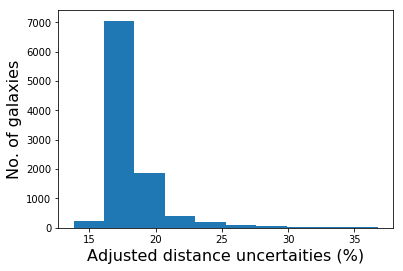

In [40]:
ee = myTable['eDM_adj']
ee = ee[((ee>0)&(flag==1))]*np.log(10.)/5.

plt.hist(ee*100)
print(np.mean(ee), np.min(ee), np.max(ee))

plt.xlabel("Adjusted distance uncertaities (%)", fontsize=16)
plt.ylabel("No. of galaxies", fontsize=16)


ee = myTable['eDM_adj']
ee = ee[((ee>0)&(flag==1))]
np.mean(10**(ee/5)-1), np.min(10**(ee/5)-1), np.max(10**(ee/5)-1)

In [41]:
10**(0.4/5)-1

0.20226443461741295

(0.15255205478234804, 0.06946524857125357, 0.36768906998619066)

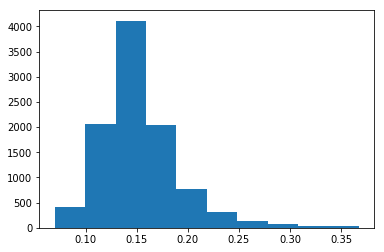

In [42]:
ee = myTable['DM_err']
# ee = np.abs(myTable['DM_75']-myTable['DM_av'])
ee = ee[((ee>0)&(flag==1))]*np.log(10.)/5.
plt.hist(ee)
np.mean(ee), np.min(ee), np.max(ee)

In [43]:
len(ee)

9967

In [44]:
for cols in df_paper.columns:
    print(cols)

flag
DM_av
DM_err
eDM_adj
DMriz_fid
DMriz_err
eDMriz_adj
DMr_fid
DMr_err
eDMr_adj
DMi_fid
DMi_err
eDMi_adj
DMz_fid
DMz_err
eDMz_adj
DM1_fid
DM1_err
eDM1_adj
DM_75
PGC1
Nest
logMs_av
logMs_riz
logMs_r
logMs_i
logMs_z
logMs_W1
logMgas
logMb
Vh
Vls
V3k
Vmod
f_cosmology
logWimx
logWimx_e
F21
eF21
inc
inc_e
ggg
rrr
iii
zzz
w1
w2
Qs
Qw
RA
DEC
gl
gb
sgl
sgb
Nkt
N15
sglg
sgbg
Vmodg


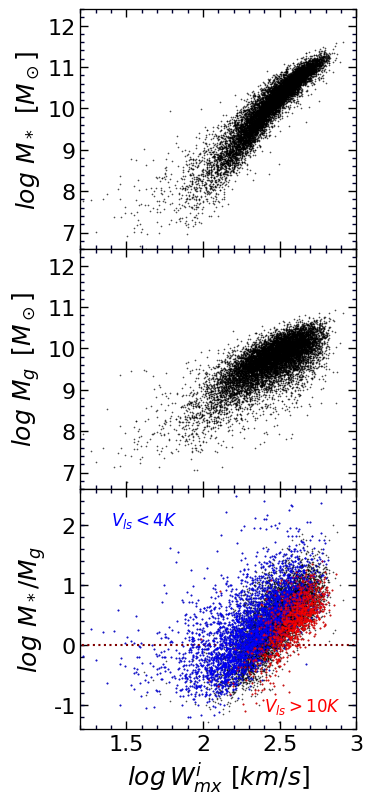

In [45]:
from matplotlib.ticker import MultipleLocator

fig = py.figure(figsize=(3,9), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
nrows = 3
ncols = 1
gs = gridspec.GridSpec(nrows, ncols)

X = df_paper.logWimx.values

Y = df_paper.logMs_av.values
ax = plt.subplot(gs[0])
ax.plot(X, Y, 'ko', alpha=0.7, ms=1.2, mfc='k', mec='none')
set_axes(ax, (1.2,3), (6.6,12.4))
plt.setp(ax.get_xticklabels(), visible=False)
ylabel=r'$log \/\/ M_* \/\/\/ [M_\odot]$'
ax.set_ylabel(ylabel, fontsize=18)

Y = df_paper.logMgas.values
ax = plt.subplot(gs[1])
ax.plot(X, Y, 'ko', alpha=0.7, ms=1.2, mfc='k', mec='none')
set_axes(ax, (1.2,3), (6.6,12.4))
plt.setp(ax.get_xticklabels(), visible=False)
ylabel=r'$log \/\/ M_g \/\/\/ [M_\odot]$'
ax.set_ylabel(ylabel, fontsize=18)

Y = df_paper.logMs_av.values - df_paper.logMgas.values
ax = plt.subplot(gs[2])
ax.plot(X, Y, 'ko', alpha=0.7, ms=1.2, mfc='k', mec='none')
ax.plot([-10,10],[0,0], ':', color='maroon')
ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
plt.xticks([1.5,2,2.5,3], ('1.5', '2', '2.5','3'))
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
plt.yticks([-1,0,1,2], ('-1', '0', '1','2'))
x_ax, y_ax = set_axes(ax, (1.2,3), (-1.4,2.6))
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.2))
plt.yticks([-1,0,1,2], ('-1', '0', '1','2'))
y_ax.yaxis.set_major_locator(MultipleLocator(1))
y_ax.yaxis.set_minor_locator(MultipleLocator(0.2))
ax.set_ylabel(r'$log \/\/ M_*/M_g$', fontsize=18)
ax.set_xlabel(r'$log \/ W_{mx}^i \/\/[km/s]$', fontsize=18)

df_blue = df_paper[df.Vls<4000]
Y_blue = df_blue.logMs_av.values - df_blue.logMgas.values
ax.plot(df_blue.logWimx.values, Y_blue, 'ko', alpha=0.7, ms=1.5, mfc='b', mec='none')
ax.text(1.4, 2.0, r'$V_{ls}<4K$', fontsize=12, color='b')

df_red = df_paper[df.Vls>10000]
Y_red = df_red.logMs_av.values - df_red.logMgas.values
ax.plot(df_red.logWimx.values, Y_red, 'ko', alpha=0.7, ms=1.5, mfc='r', mec='none')
ax.text(2.4, -1.1, r'$V_{ls}>10K$', fontsize=12, color='r')


plt.subplots_adjust(hspace=0, wspace=0)

In [46]:
def plotak(ax, df_paper, w1=2.4, w2=2.6, twiddle=False, color='r'):

    dff_paper = df_paper[((df_paper.logWimx>=w1)&(df_paper.logWimx<w2))]

    Mgas = 10**dff_paper.logMgas.values
    logMhi = np.log10(Mgas/1.33)
    logMhi_ = logMhi-5.64E-5*dff_paper.Vls.values
    Ms = 10**dff_paper.logMs_av.values

    X = dff_paper.Vls.values
    
    if not twiddle:
        Y = dff_paper.logMs_av.values - logMhi
    else:
        Y = dff_paper.logMs_av.values - logMhi_

    ax.plot(X, Y, 'ko', alpha=0.2, ms=1.8, mfc='k', mec='none')

    for i in np.arange(0, 20000, 2000):
        xp = []
        yp = []
        for ii in range(len(X)):
            xi = X[ii]
            if xi>=i and xi<i+2000:
                xp.append(xi)
                yp.append(Y[ii])
        if len(xp)>3: 

            xp = np.asarray(xp)
            yp = np.asarray(yp)

            xp = xp[((yp>-1)&(yp<2.5))]
            yp = yp[((yp>-1)&(yp<2.5))]

            N = len(xp)
            ax.errorbar(i+1000, np.nanmean(yp), 
                        yerr=np.nanstd(yp), 
                        xerr=0, fmt='o', 
                        color=color, ms=6, mfc=color, capsize=2) 
            
    plt.xticks([0,5000,10000,15000,20000], ('0', '5', '10','15','20'))
    set_axes(ax, (0, 20000), (-1.2,2.7), fontsize=13)
    
    ee = np.nanmean((dff_paper.eF21/dff_paper.F21/np.log(10)).dropna().values)
    ye = np.sqrt(ee**2+0.08**2)
    xe = np.nanmean((dff_paper.logWimx_e).dropna().values)

    ax.errorbar([2000],[2.3], xerr=xe, yerr=ye, fmt='o', 
                        color='k', ms=3, capsize=3)

/media/Data/Home/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/media/Data/Home/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in greater
/media/Data/Home/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in less
/media/Data/Home/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in greater
/media/Data/Home/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in less


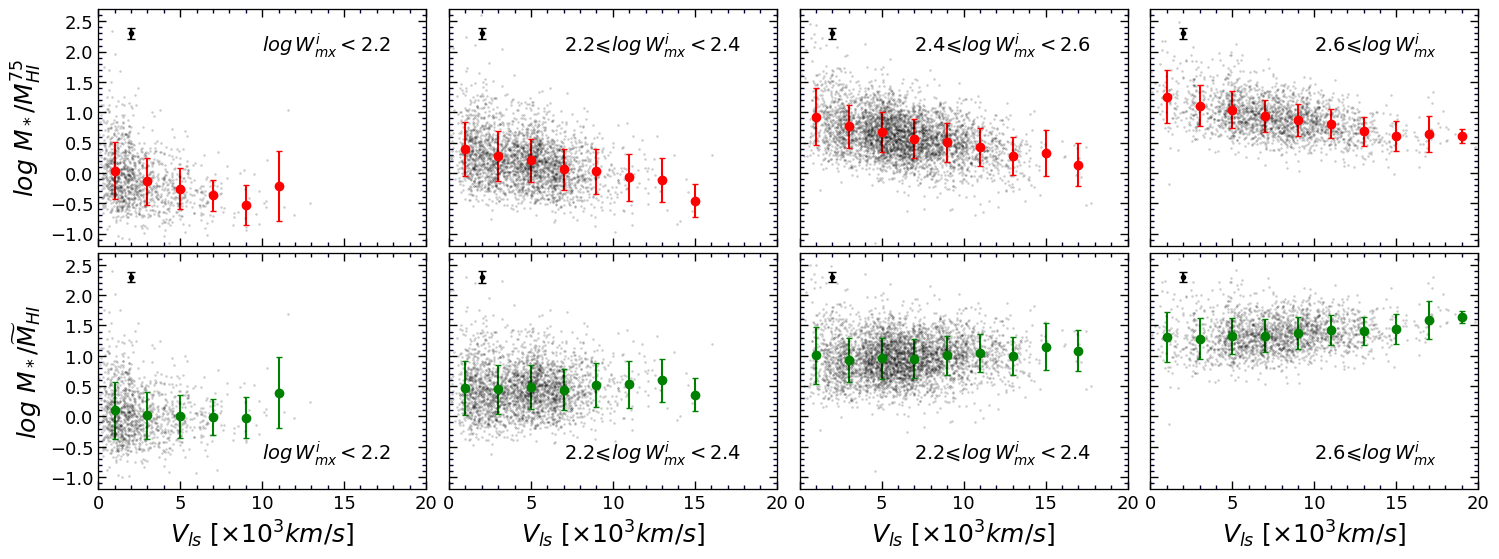

In [47]:
fig = py.figure(figsize=(15,6), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
nrows = 2
ncols = 4
gs = gridspec.GridSpec(nrows, ncols); p=0

ax = plt.subplot(gs[p]) ; p+=1
plotak(ax, df_paper, w1=0, w2=2.2, twiddle=False, color='r')   
ax.set_ylabel(r'$log \/\/ M_*/M^{75}_{HI}$', fontsize=18) 
plt.setp(ax.get_xticklabels(), visible=False)
ax.text(10000,2,r'$log \/ W_{mx}^i < 2.2 $', fontsize=14)

ax = plt.subplot(gs[p]); p+=1
plotak(ax, df_paper, w1=2.2, w2=2.4, twiddle=False, color='r')   
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
ax.text(7000,2,r'$2.2 \leqslant log \/ W_{mx}^i < 2.4 $', fontsize=14)


ax = plt.subplot(gs[p]); p+=1
plotak(ax, df_paper, w1=2.4, w2=2.6, twiddle=False, color='r')   
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
ax.text(7000,2,r'$2.4 \leqslant log \/ W_{mx}^i < 2.6 $', fontsize=14)

ax = plt.subplot(gs[p]); p+=1
plotak(ax, df_paper, w1=2.6, w2=3, twiddle=False, color='r')   
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
ax.text(10000,2,r'$2.6 \leqslant log \/ W_{mx}^i $', fontsize=14)

##################################################################################################

ax = plt.subplot(gs[p]) ; p+=1
plotak(ax, df_paper, w1=0, w2=2.2, twiddle=True, color='g')   
ax.set_ylabel(r'$log \/\/ M_*/\widetilde{M}_{HI}$', fontsize=18) 
ax.set_xlabel(r'$V_{ls} \/\/ [\times 10^{3}km/s] $', fontsize=18)
ax.text(10000,-0.7,r'$log \/ W_{mx}^i < 2.2 $', fontsize=14)

ax = plt.subplot(gs[p]); p+=1
plotak(ax, df_paper, w1=2.2, w2=2.4, twiddle=True, color='g')   
ax.set_xlabel(r'$V_{ls} \/\/ [\times 10^{3}km/s] $', fontsize=18)
plt.setp(ax.get_yticklabels(), visible=False)
ax.text(7000,-0.7,r'$2.2 \leqslant log \/ W_{mx}^i < 2.4 $', fontsize=14)

ax = plt.subplot(gs[p]); p+=1
plotak(ax, df_paper, w1=2.4, w2=2.6, twiddle=True, color='g')   
ax.set_xlabel(r'$V_{ls} \/\/ [\times 10^{3}km/s] $', fontsize=18)
plt.setp(ax.get_yticklabels(), visible=False)
ax.text(7000,-0.7,r'$2.2 \leqslant log \/ W_{mx}^i < 2.4 $', fontsize=14)

ax = plt.subplot(gs[p]); p+=1
plotak(ax, df_paper, w1=2.6, w2=3, twiddle=True, color='g')   
ax.set_xlabel(r'$V_{ls} \/\/ [\times 10^{3}km/s] $', fontsize=18)
plt.setp(ax.get_yticklabels(), visible=False)
ax.text(10000,-0.7,r'$2.6 \leqslant log \/ W_{mx}^i $', fontsize=14)

plt.subplots_adjust(hspace=0.03, wspace=0.07)




In [48]:
DM_W1 = df["DM1_fid"].values
DM_r = df["DMr_fid"].values
DM_i = df["DMi_fid"].values
DM_z = df["DMz_fid"].values
DM_riz = df["DMriz_fid"].values
DM_75 = df["DM_75"].values
Vls = df["Vls"].values

iii = df["iii"].values
w11 = df["w1"].apply(lambda x: np.float64(x)).values

/media/Data/Home/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.
/media/Data/Home/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()


Text(0.5,1,'W1')

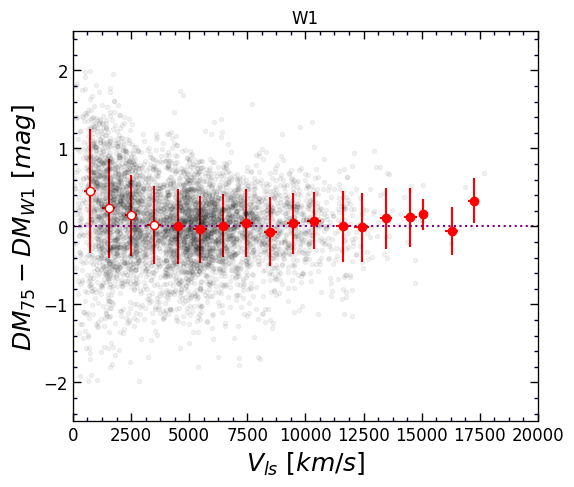

In [49]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


X = Vls
Y = DM_W1-DM_75
# Z = Vls

X = X[Y>-100]
Y = Y[Y>-100]

X = X[np.abs(Y)<2]
Y = Y[np.abs(Y)<2]

ax.plot(X, Y, 'k.', alpha=0.05)

for i in np.arange(4000,20000,1000):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+1000:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)   


for i in np.arange(0,4000,1000):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+1000:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6, mfc='white')   
        
        
ax.set_xlabel(r'$V_{ls} \/\/[km/s]$', fontsize=18) 
ax.set_ylabel(r'$DM_{75} - DM_{W1}\/\/[mag]$', fontsize=18)
# ax.set_ylabel(r'$log \/ (D_{75}/D_{fid})$', fontsize=18)

ax.plot([0,20000], [0,0], ':', color='purple')

set_axes(ax, (0,20000), (-2.5,2.5), fontsize=12)

ax.set_title("W1")

/media/Data/Home/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.
/media/Data/Home/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()


Text(0.5,1,'<riz>')

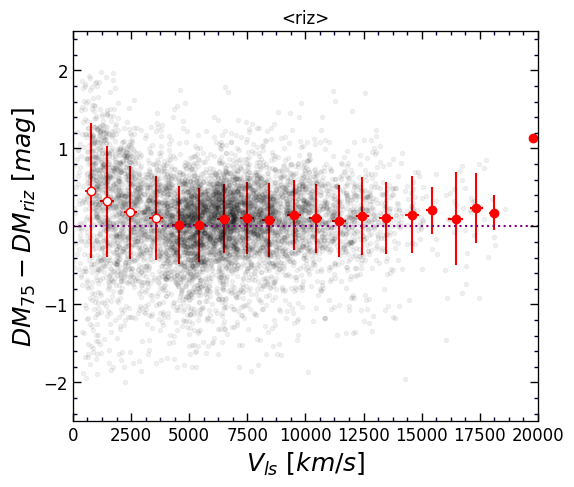

In [50]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


X = Vls
Y = DM_riz-DM_75
# Z = Vls

X = X[Y>-100]
Y = Y[Y>-100]

X = X[np.abs(Y)<2]
Y = Y[np.abs(Y)<2]

ax.plot(X, Y, 'k.', alpha=0.05)

for i in np.arange(4000,20000,1000):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+1000:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)   


for i in np.arange(0,4000,1000):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+1000:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6, mfc='white')   
        
        
ax.set_xlabel(r'$V_{ls} \/\/[km/s]$', fontsize=18) 
ax.set_ylabel(r'$DM_{75} - DM_{riz}\/\/[mag]$', fontsize=18)
# ax.set_ylabel(r'$log \/ (D_{75}/D_{fid})$', fontsize=18)

ax.plot([0,20000], [0,0], ':', color='purple')

set_axes(ax, (0,20000), (-2.5,2.5), fontsize=12)

ax.set_title("<riz>")

/media/Data/Home/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app
/media/Data/Home/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()


Text(0.5,1,'<riz>')

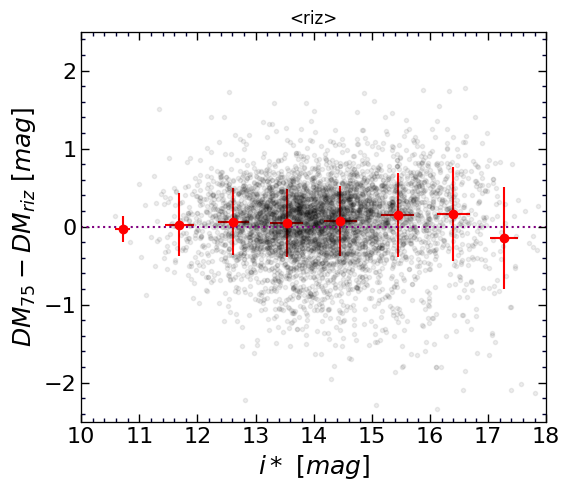

In [51]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


X = iii
Y = DM_riz-DM_75
Z = Vls

X = X[Z>4000]
Y = Y[Z>4000]

ax.plot(X, Y, 'k.', alpha=0.07)

X = X[np.abs(Y)<2]
Y = Y[np.abs(Y)<2]

for i in np.arange(10,18,1):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+1 and ~np.isnan(xi) and ~np.isnan(Y[ii]):
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.mean(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)   
#         print(np.mean(xp), np.median(yp))

        
ax.set_xlabel(r'$i* \/\/[mag]$', fontsize=18) 
ax.set_ylabel(r'$DM_{75} - DM_{riz}\/\/[mag]$', fontsize=18)
# ax.set_ylabel(r'$log \/ (D_{75}/D_{fid})$', fontsize=18)


ax.plot([10,18], [0,0], ':', color='purple')

set_axes(ax, (10,18), (-2.5,2.5))

ax.set_title("<riz>")

/media/Data/Home/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app
/media/Data/Home/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()


Text(0.5,1,'W1')

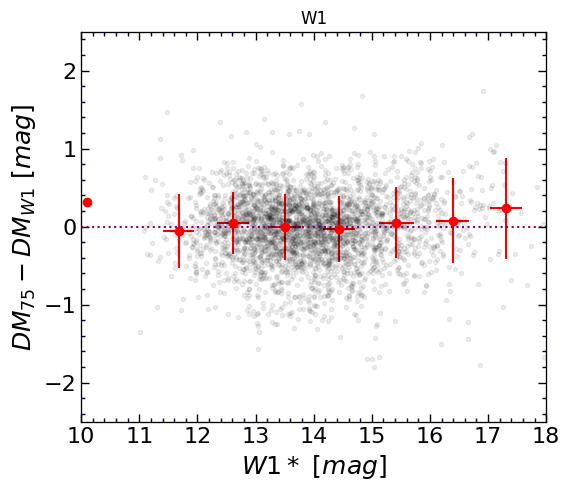

In [52]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


X = w11
Y = DM_W1-DM_75
Z = Vls

X = X[Z>4000]
Y = Y[Z>4000]

ax.plot(X, Y, 'k.', alpha=0.07)

X = X[np.abs(Y)<2]
Y = Y[np.abs(Y)<2]

for i in np.arange(10,18,1):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+1 and ~np.isnan(xi) and ~np.isnan(Y[ii]):
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.mean(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)   
#         print(np.mean(xp), np.median(yp))

        
ax.set_xlabel(r'$W1* \/\/[mag]$', fontsize=18) 
ax.set_ylabel(r'$DM_{75} - DM_{W1}\/\/[mag]$', fontsize=18)
# ax.set_ylabel(r'$log \/ (D_{75}/D_{fid})$', fontsize=18)


ax.plot([10,18], [0,0], ':', color='purple')

set_axes(ax, (10,18), (-2.5,2.5))

ax.set_title("W1")

In [53]:
df["w1"].values

array([' 11.89 ', ' 16.07 ', ' 13.59 ', ..., '  0.00 ', '  0.00 ',
       ' 15.02 '], dtype=object)

In [54]:
Y

array([ 0.14118943, -0.27304412,  0.20844161, ...,  0.6521962 ,
        0.1804466 , -0.59731987])

In [55]:
w11

array([11.89, 16.07, 13.59, ...,  0.  ,  0.  , 15.02])

In [56]:
cf3 = pd.read_csv("../calibrators/cf3.csv", sep='|')

for col in cf3.columns:
    newcol = col.strip()
    cf3.rename(columns={col:newcol}, inplace=True)

cf3.set_index('PGC', inplace=True)

cf3['DM_cf3'] = cf3['DM']
cf3 = cf3[['DM_cf3']]

df34 = df_paper.join(cf3, how='inner')

/home/ehsan/anaconda3/envs/py2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (5,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [57]:
def constant(x,delta):
    return delta

(array([-0.07685074]), array([[6.97251986e-05]]))
(-0.046831733993986546, 0.2951470796959941)


Text(2500,-2,'$\\Delta =-0.047\\pm0.295$ [mag]')

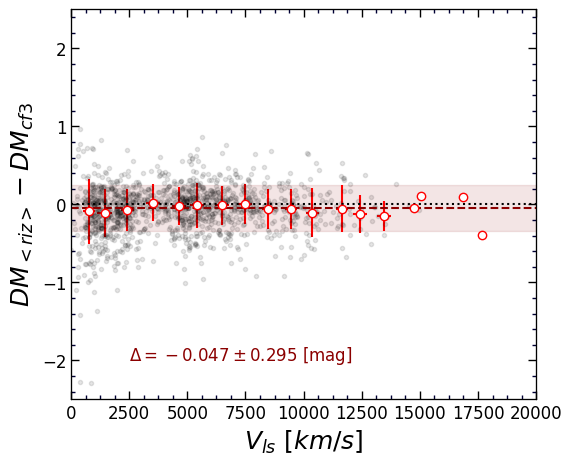

In [58]:
dff = df34[df34.Qs>2].dropna()

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


X = dff.Vls.values
Y = dff.DMriz_fid.values-dff.DM_cf3.values

Ye = np.sqrt(dff.DMriz_err.values**2+0.4**2)

fit, cov = curve_fit(constant, X, Y, sigma=Ye)
print(fit, cov)

ax.plot(X, Y, 'k.', alpha=0.1)

X = X[Y<1]
Y = Y[Y<1]

X = X[Y>-1.5]
Y = Y[Y>-1.5]

for i in np.arange(0,20000,1000):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+1000:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6, mfc='white')   
        
ax.set_xlabel(r'$V_{ls} \/\/[km/s]$', fontsize=18) 
# ax.set_ylabel(r'$DM_{75} - DM_{fid}$', fontsize=18)
ax.set_ylabel(r'$DM_{<riz>}-DM_{cf3}$', fontsize=18)

ax.plot([0,20000], [0,0], ':', color='k')

set_axes(ax, (0,20000), (-2.5,2.5), fontsize=12)

# ax.set_title("BTFR: W1-band")

med = np.median(Y)
std = np.std(Y-med)
y = np.asarray([med,med])
ax.plot([0,20000], y, '--', color='darkred')
ax.fill_between([0,20000], y+std, y-std, color='darkred', alpha=0.10)

print(med,std)

ax.text(2500, -2, r"$\Delta =" + '%.3f'%med+'\pm'+'%.3f'%std+'$'+ ' [mag]', color='darkred', fontsize=12)

(array([-0.04876817]), array([[6.67199945e-05]]))
(-0.014103206008797997, 0.28723730137176245)


Text(2500,-2,'$\\Delta =-0.014\\pm0.287$ [mag]')

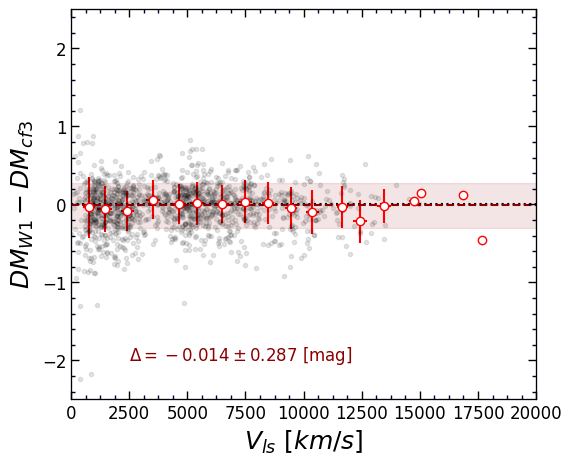

In [59]:
dff = df34[df34.Qw>2].dropna()

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


X = dff.Vls.values
Y = dff.DM1_fid.values-dff.DM_cf3.values

Ye = np.sqrt(dff.DM1_err.values**2+0.4**2)

fit, cov = curve_fit(constant, X, Y, sigma=Ye)
print(fit, cov)

ax.plot(X, Y, 'k.', alpha=0.1)

X = X[Y<1]
Y = Y[Y<1]

X = X[Y>-1.5]
Y = Y[Y>-1.5]

for i in np.arange(0,20000,1000):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+1000:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6, mfc='white')   
        
ax.set_xlabel(r'$V_{ls} \/\/[km/s]$', fontsize=18) 
# ax.set_ylabel(r'$DM_{75} - DM_{fid}$', fontsize=18)
ax.set_ylabel(r'$DM_{W1}-DM_{cf3}$', fontsize=18)

ax.plot([0,20000], [0,0], ':', color='k')

set_axes(ax, (0,20000), (-2.5,2.5), fontsize=12)

# ax.set_title("BTFR: W1-band")

med = np.median(Y)
std = np.std(Y-med)
y = np.asarray([med,med])
ax.plot([0,20000], y, '--', color='darkred')
ax.fill_between([0,20000], y+std, y-std, color='darkred', alpha=0.10)

print(med,std)

ax.text(2500, -2, r"$\Delta =" + '%.3f'%med+'\pm'+'%.3f'%std+'$'+ ' [mag]', color='darkred', fontsize=12)

(array([-0.02718107]), array([[1.04076587e-05]]))
(-0.027181072992922165, 0.13483711235268037)


Text(2500,-0.6,'$\\Delta =-0.027\\pm0.135$ [mag]')

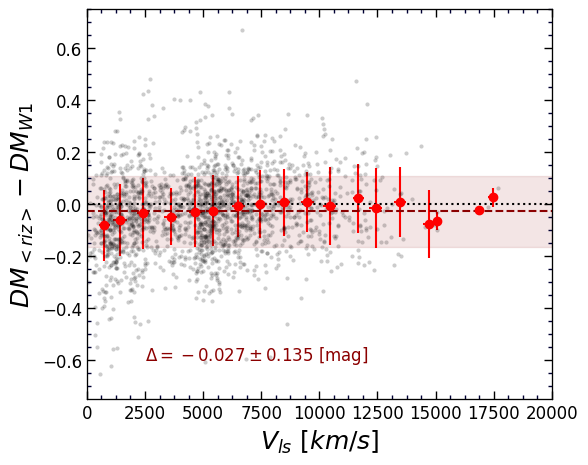

In [60]:
dff = df_paper[(df_paper.Qs>2)&(df_paper.Qw>3)].dropna() # 
# dff = df[(df.Qs>2)]

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


X = dff.Vls.values
Y = dff.DMriz_fid.values-dff.DM1_fid.values
Ye = np.sqrt(dff.DMriz_err.values**2+dff.DM1_err.values**2)

fit, cov = curve_fit(constant, X, Y, sigma=Ye)
print(fit, cov)

ax.plot(X, Y, 'k.', alpha=0.2, mfc='k', mec='none')

X = X[np.abs(Y)<0.40]
Y = Y[np.abs(Y)<0.40]


for i in np.arange(0,20000,1000):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+1000:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)   
        
ax.set_xlabel(r'$V_{ls} \/\/[km/s]$', fontsize=18) 
# ax.set_ylabel(r'$DM_{75} - DM_{fid}$', fontsize=18)
ax.set_ylabel(r'$DM_{<riz>}-DM_{W1}$', fontsize=18)

ax.plot([0,20000], [0,0], ':', color='k')

set_axes(ax, (0,20000), (-.75,.75), fontsize=12)

# ax.set_title("BTFR: W1-band")

med = fit[0] #np.median(Y)
std = np.std(Y-fit[0])
y = np.asarray([med,med])
ax.plot([0,20000], y, '--', color='darkred')
ax.fill_between([0,20000], y+std, y-std, color='darkred', alpha=0.10)

print(med,std)

ax.text(2500, -0.6, r"$\Delta =" + '%.3f'%med+'\pm'+'%.3f'%std+'$'+ ' [mag]', color='darkred', fontsize=12)

In [61]:
import matplotlib.ticker

class OOMFormatter(matplotlib.ticker.ScalarFormatter):
    def __init__(self, order=0, fformat="%1.1f", offset=True, mathText=True):
        self.oom = order
        self.fformat = fformat
        matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_orderOfMagnitude(self, nothing):
        self.orderOfMagnitude = self.oom
    def _set_format(self, vmin, vmax):
        self.format = self.fformat
        if self._useMathText:
            self.format = '$%s$' % matplotlib.ticker._mathdefault(self.format)

In [62]:
def myHubble(D, H0):
    return H0    


def plotHubble(ax, X, Y, Ye, band="", color='red'):
       
    ax.plot(X, 10**Y, 'k.', alpha=0.05, mec='white', ms=5)
    
#     m = np.median(Y[X>4000])
#     e1 = np.std(Y[X>4000])/np.sqrt(len(Y[X>4000])) 
#     e2 = m/np.sqrt(len(Y[X>4000])) 
#     e = np.sqrt(e1**2)
#     H0e_fit = 10**m*e*np.log(10)    
    
    for i in np.arange(0,18000, 1000):
        xp = []
        yp = []
        ype  = []
        for ii in range(len(X)):
            xi = X[ii]
            if xi>=i and xi<i+1000 and Y[ii]>-10000: #and Ye[ii]>0:
                xp.append(xi)
                yp.append(Y[ii])
                ype.append(Ye[ii])
        if len(xp)>2:
            yp = np.asarray(yp)
            ype = np.asarray(ype)
            
            fit, cov = curve_fit(myHubble, xp, yp, sigma=ype)
            yy = fit[0]
            e = np.sqrt(cov[0])
            H0e_fit = (10**yy)*np.log(10.)*np.sqrt(cov[0])
            H0 = 10**yy  
    
            if np.median(xp)>4000:
                ax.errorbar(i+500, 10**yy, yerr=H0e_fit, xerr=np.std(xp), fmt='o', 
                        color=color, ms=5, capsize=2)     
            else:
                ax.errorbar(i+500, 10**yy, yerr=H0e_fit, xerr=np.std(xp), fmt='o', 
                        color=color, ms=5, capsize=2)  
            

    
    fit, cov = curve_fit(myHubble, X[X>4000], Y[X>4000], sigma=Ye[X>4000])
    yy = fit[0]
    sigma = np.std(Y[X>4000]-yy)
    
    
    ind = ((X>4000)&(np.abs(Y-yy)<3.5*sigma))
    fit, cov = curve_fit(myHubble, X[ind], Y[ind], sigma=Ye[ind])
    yy = fit[0]
    H0e_fit = (10**yy)*np.log(10.)*np.sqrt(cov[0])
    H0 = 10**yy  

    ax.plot([4000,20000], [H0, H0], '--', color='blue')

    x_ax, y_ax = set_axes(ax, (0,20000), (35,150), fontsize=14) 

    ax.set_yscale('log')

    from matplotlib.ticker import MultipleLocator

    from matplotlib.ticker import NullFormatter
    
    ax.set_yticks(np.arange(30,150, step=30))
    ax.yaxis.set_major_formatter(NullFormatter())  
    ax.yaxis.set_minor_formatter(NullFormatter())

    ax.yaxis.set_major_locator(MultipleLocator(30))
    ax.yaxis.set_minor_locator(MultipleLocator(10))

    plt.yticks([40, 70, 100, 130], ('40', '70', '100','130'))


    y_ax.set_yticks(np.arange(30,150, step=30))
    y_ax.set_yscale('log')
    y_ax.yaxis.set_major_formatter(NullFormatter())  
    y_ax.yaxis.set_minor_formatter(NullFormatter())
    y_ax.yaxis.set_major_locator(MultipleLocator(30))
    y_ax.yaxis.set_minor_locator(MultipleLocator(10))


    Ylm = ax.get_ylim() ; Xlm = ax.get_xlim()
    x0 = 0.80*Xlm[0]+0.20*Xlm[1]
    y0 = 0.95*Ylm[0]+0.05*Ylm[1] 
    unit= '   km/s/Mpc'
    ax.text(x0,y0, r"$ \langle H_0 \rangle_{"+band+"}= $"+"%.1f" % H0+'$\pm$'+"%.1f" % H0e_fit+unit, fontsize=14, 
            color='blue', backgroundcolor='white')

    ax.xaxis.set_major_formatter(OOMFormatter(3, "%d"))
    ax.ticklabel_format(axis='x', style='sci', scilimits=(3,3))



/media/Data/Home/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in log10
/media/Data/Home/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in log10
/media/Data/Home/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in less
/media/Data/Home/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in log10
/media/Data/Home/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in log10
/media/Data/Home/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in less
/media/Data/Home/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in log10
/media/Data/Hom

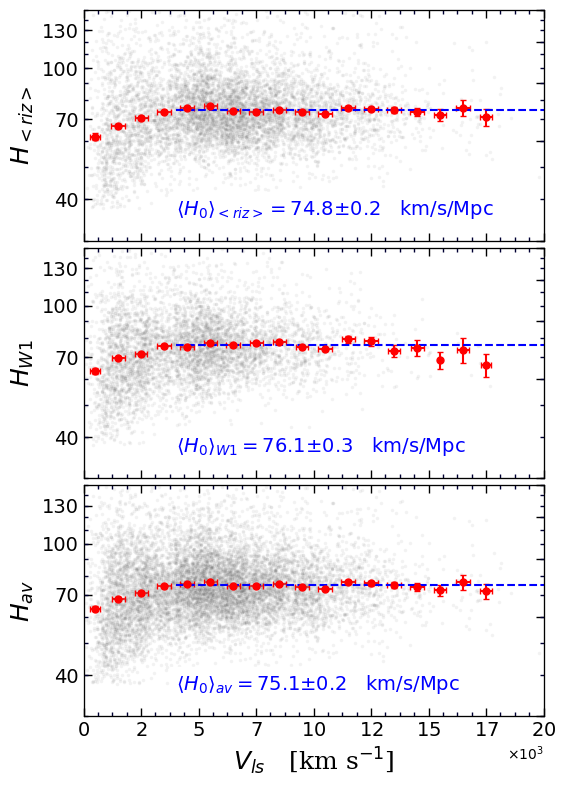

In [68]:
fig = py.figure(figsize=(5, 11.8), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(4,1) ; p=0

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

####################################################
####################################################
ax = plt.subplot(gs[p]) ; p+=1

dff = df_paper[(df_paper.Qs>2)&(df_paper.logWimx>0)&(df_paper.flag>0)][["Vls","f_cosmology","DMriz_fid","eDMriz_adj", "DMriz_err"]].dropna()
X = dff.Vls.values
Y  = np.log10(dff.Vls.values*dff.f_cosmology.values)-(dff.DMriz_fid.values-25)/5.
# Ye = dff.eDMriz_adj.values/5.
# Ye = dff.DMriz_err.values/5.
Ye = np.sqrt(dff.DMriz_err.values*0+0.4**2)/5.

Y0 = dff.Vls.values*dff.f_cosmology.values
DM_75 = 5*np.log10(Y0/75.)+25.
Y0 = DM_75-dff.DMriz_fid.values

ind, = np.where(np.abs(Y0)<1.5)

plotHubble(ax, X[ind], Y[ind], Ye[ind], band="<riz>")
plt.setp(ax.get_xticklabels(), visible=False)
ax.set_ylabel(r'$H_{<riz>}$', fontsize=18, fontdict=font) 
# ####################################################
ax = plt.subplot(gs[p]) ; p+=1

dff = df_paper[(df_paper.Qw>2)&(df_paper.logWimx>0)&(df_paper.flag>0)][["Vls","f_cosmology","DM1_fid","eDM1_adj", "DM1_err"]].dropna()
X = dff.Vls.values
Y  = np.log10(dff.Vls.values*dff.f_cosmology.values)-(dff.DM1_fid.values-25)/5.
# Ye = dff.eDM1_adj.values/5.
# Ye = dff.DM1_err.values/5.
Ye = np.sqrt(dff.DM1_err.values*0+0.4**2)/5.

Y0 = dff.Vls.values*dff.f_cosmology.values
DM_75 = 5*np.log10(Y0/75.)+25.
Y0 = DM_75-dff.DM1_fid.values

ind, = np.where(np.abs(Y0)<1.5)
plotHubble(ax, X[ind], Y[ind], Ye[ind], band="W1")
plt.setp(ax.get_xticklabels(), visible=False)
ax.set_ylabel(r'$H_{W1}$', fontsize=18, fontdict=font) 

####################################################
ax = plt.subplot(gs[p]) ; p+=1

dff = df_paper[((df_paper.Qw>2)|(df_paper.Qs>2))&(df_paper.logWimx>0)&(df_paper.flag>0)][["Vls","f_cosmology","DM_av","eDM_adj", "DM_err"]].dropna()
X = dff.Vls.values#*dff.f_cosmology.values
Y  = np.log10(dff.Vls.values*dff.f_cosmology.values)-(dff.DM_av.values-25)/5.
# Ye = dff.eDM_adj.values/5.
# Ye = dff.DM_err.values/5.
Ye = np.sqrt(dff.DM_err.values*0+0.4**2)/5.

Y0 = dff.Vls.values*dff.f_cosmology.values
DM_75 = 5*np.log10(Y0/75.)+25.
Y0 = DM_75-dff.DM_av.values

ind, = np.where(np.abs(Y0)<1.5)
plotHubble(ax, X[ind], Y[ind], Ye[ind], band="av")
# plt.setp(ax.get_xticklabels(), visible=False)
ax.set_ylabel(r'$H_{av}$', fontsize=18, fontdict=font) 



ax.set_xlabel(r'$V_{ls} $'+'   [km s'+r'$^{-1}$'+']', fontsize=18, fontdict=font) 


plt.subplots_adjust(hspace=0.03, wspace=0.2)

/media/Data/Home/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in log10
/media/Data/Home/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in log10
/media/Data/Home/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in less


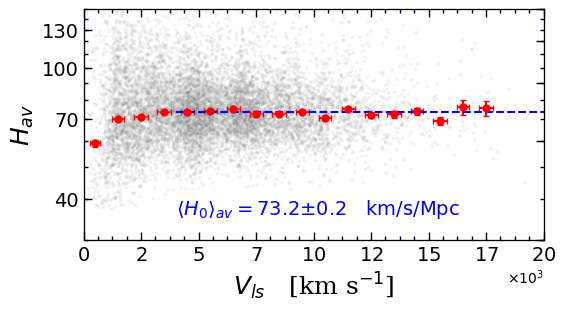

In [64]:
fig = py.figure(figsize=(5, 11.8), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(4,1) ; p=0

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }


####################################################
ax = plt.subplot(gs[p]) ; p+=1

dff = df_paper[((df_paper.Qw>2)|(df_paper.Qs>2))&(df_paper.logWimx>0)]
X = dff.V3k.values
Y  = np.log10(dff.Vmod.values)-(dff.DM_av.values-25)/5.
Ye = dff[["DMriz_err", "DM1_fid"]].mean(axis=1).values/5.

Y0 = dff.Vmod.values
DM_75 = 5*np.log10(Y0/75.)+25.
Y0 = DM_75-dff.DM_av.values

ind, = np.where(np.abs(Y0)<1.5)
plotHubble(ax, X[ind], Y[ind], Ye[ind], band="av")
# plt.setp(ax.get_xticklabels(), visible=False)
ax.set_ylabel(r'$H_{av}$', fontsize=18, fontdict=font) 



ax.set_xlabel(r'$V_{ls} $'+'   [km s'+r'$^{-1}$'+']', fontsize=18, fontdict=font) 


plt.subplots_adjust(hspace=0.03, wspace=0.2)